In [1]:
import pandas as pd
import numpy as np

'''
    Task,
    Algorithm,
    Heuristic,
    Actions,
    Expansions,
    Goal Tests,
    New Nodes,
    Node,
    Time,
'''
header = ['Task','Algorithm','Heuristic','Actions','Expansions','Goal Tests','New Nodes','Node','Time']
f = open("search_result.txt", "r")
lines = f.readlines()
search_result = []
for line in lines:
    line_split = line.split('\t')
    search_result.append([line_split[0], line_split[1], line_split[2],
        int(line_split[3][0:10].strip(' ')), int(line_split[3][10:20].strip(' ')), 
        int(line_split[3][20:32].strip(' ')), int(line_split[3][32:].strip(' ')),
        int(line_split[4]), round(float(line_split[5]), 4)])

search_result_df = pd.DataFrame(search_result, columns=header)
search_result_df

,Task,Algorithm,Heuristic,Actions,Expansions,Goal Tests,New Nodes,Node,Time
0,Air Cargo Problem 1,breadth_first_search,,20,43,56,178,6,0.0036
1,Air Cargo Problem 1,depth_first_graph_search,,20,21,22,84,20,0.0022
2,Air Cargo Problem 1,uniform_cost_search,,20,60,62,240,6,0.0060
3,Air Cargo Problem 1,greedy_best_first_graph_search,h_unmet_goals,20,7,9,29,6,0.0009
4,Air Cargo Problem 1,greedy_best_first_graph_search,h_pg_levelsum,20,6,8,28,6,0.2675
5,Air Cargo Problem 1,greedy_best_first_graph_search,h_pg_maxlevel,20,6,8,24,6,0.2039
6,Air Cargo Problem 1,greedy_best_first_graph_search,h_pg_setlevel,20,6,8,28,6,0.9140
7,Air Cargo Problem 1,astar_search,h_unmet_goals,20,50,52,206,6,0.0057
8,Air Cargo Problem 1,astar_search,h_pg_levelsum,20,28,30,122,6,0.7120
9,Air Cargo Problem 1,astar_search,h_pg_maxlevel,20,43,45,180,6,0.8314


In [2]:
indexes = [e for e in range(0, 27)] + [33, 34, 35, 36, 37, 40, 41]
search_result_df = search_result_df[search_result_df.index.isin(indexes)]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

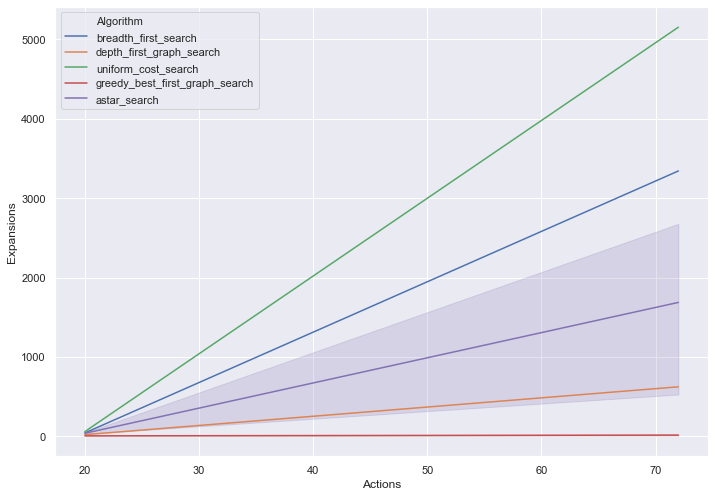

In [4]:
sns.lineplot(x="Actions", y="Expansions",
             hue="Algorithm",
             data=search_result_df[0:22])

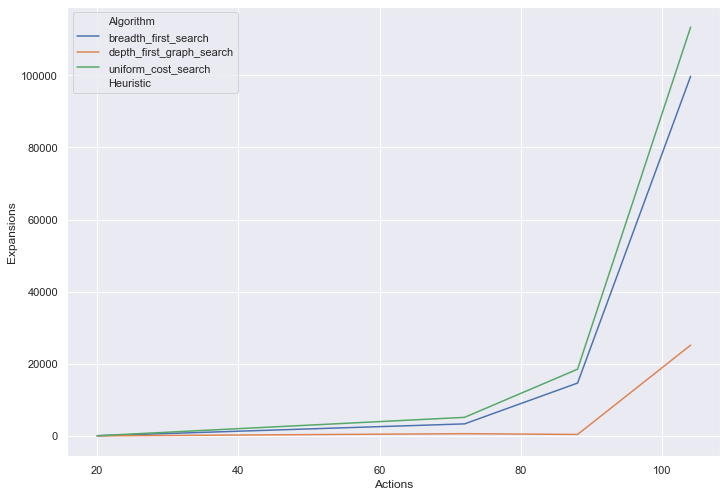

In [7]:
sns.lineplot(x="Actions", y="Expansions",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Heuristic'] == '')])

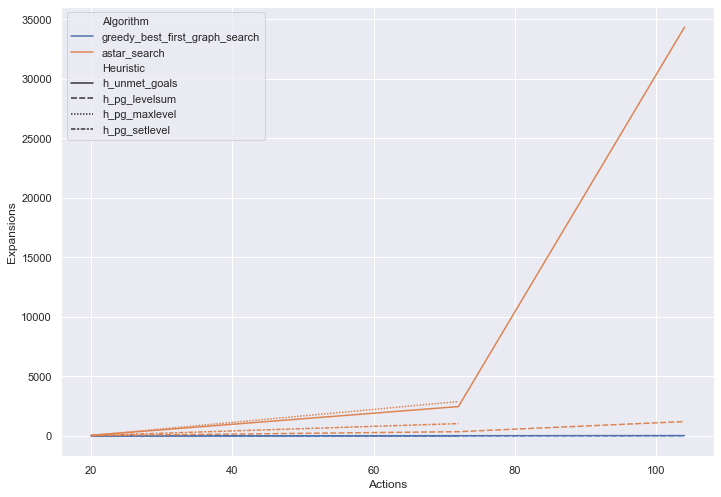

In [49]:
sns.lineplot(x="Actions", y="Expansions",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Algorithm'] == 'greedy_best_first_graph_search') | (search_result_df['Algorithm'] == 'astar_search')])

### Analyze the search complexity as a function of domain size, search algorithm, and heuristic.

As we can ses from the charts above the number of expanded nodes growes exponentially to the number problem actions. Only two algorithms Greedy Best First Search and Depth First Search were able to get trought the problem without cunsuming large amount of memory. This explained by the fact that f = h helped GBFS to expand only nodes on it's shortest route to the goal and DFS has lowest O(bm)  space complexity amongst all algorithms. 
Exponential grows of state set is a problem for any search algorithms, except above ones. Hovewer, implementing good heuristic function helps to obtain good results with A* search.

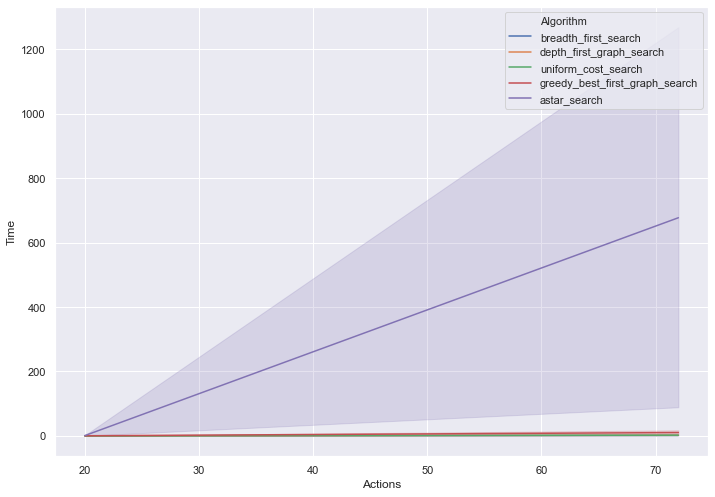

In [5]:
sns.lineplot(x="Actions", y="Time",
             hue="Algorithm",
             data=search_result_df[0:22])

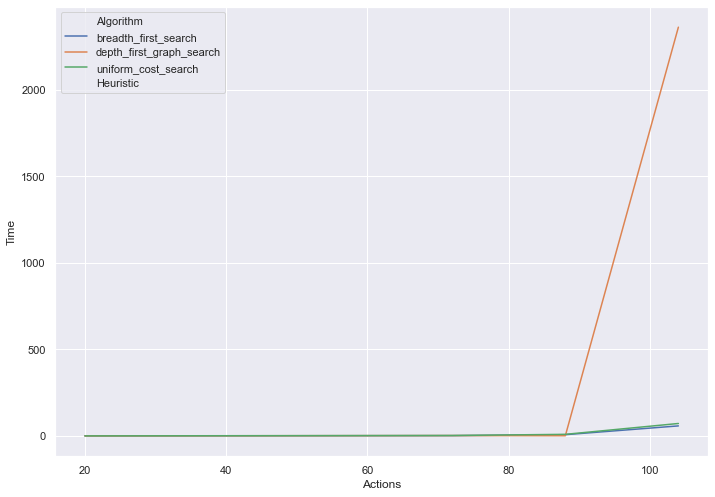

In [9]:
sns.lineplot(x="Actions", y="Time",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Heuristic'] == '')])

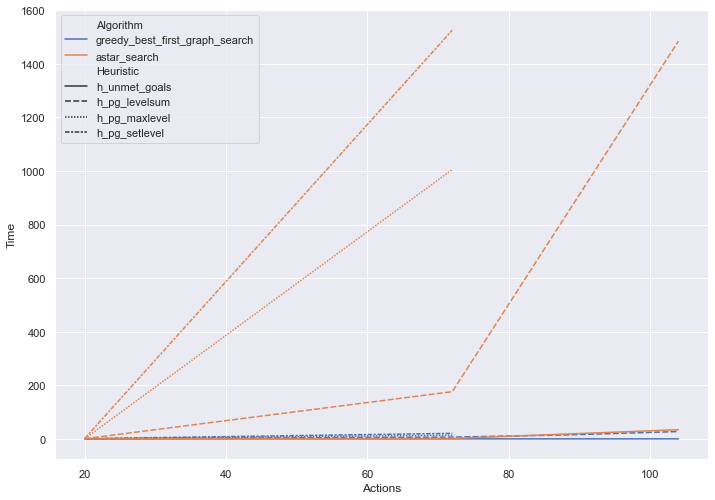

In [6]:
sns.lineplot(x="Actions", y="Time",
             hue="Algorithm", style='Heuristic', 
             data=search_result_df[(search_result_df['Algorithm'] == 'greedy_best_first_graph_search') | (search_result_df['Algorithm'] == 'astar_search')])

### Analyze search time as a function of domain size, search algorithm, and heuristic.

Computation complexity is not a problem for problems 1 and 2. The only algorithm which didn't manage to complete in reasonable time is A* with expensive MaxLevel and SetLevel heuristics (LevelSum is performing better but unable to catch up with uninformed search algorithms). Problem 3 is hard for A*, thus using heuristics MaxLevel, SetLevel and potentially LevelSum to solve Problem 4 is not feasible. 